### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [10]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Uber Trips Analysis (2)\data\uber-raw-data-aug14.csv')
df.head()
df = pd.DataFrame(data)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [13]:
# Convert the 'Date/Time' column to datetime format

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group the data by date and count the number of pickups
df['Date'] = df['Date/Time'].dt.date

# Group the data by date and count the number of pickups
pickup_counts = df.groupby('Date')['Lat'].count()

# Get the date with the highest count
most_pickups_date = pickup_counts.idxmax()

print("Date with the most number of Uber pickups is:", most_pickups_date)


Date with the most number of Uber pickups is: 2014-08-07


Q.2 How many Uber pickups were made on the date with the highest number of pickups?

Skill Test: Indexing and filtering

In [16]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups#

# Get the count of pickups on the highest date
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
pickup_counts = df.groupby('Date')['Lat'].count()

most_pickups_date = pickup_counts.idxmax()
number_of_pickups = pickup_counts[date_with_highest_pickups]

print("The date with the most number of Uber pickups is:", most_pickups_date)
print("The number of Uber pickups on the date with the highest number of pickups is:", number_of_pickups)


NameError: name 'date_with_highest_pickups' is not defined

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [19]:
# Count the number of unique TLC base companies

unique_companies = df['Base'].nunique()

# Count the number of unique TLC base companies
print(unique_companies)
df = pd.DataFrame(data)


5


NameError: name 'data' is not defined

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [20]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
highest_pickup_company = pickup_counts.idxmax()

# Find the TLC base company with the highest number of pickups
print("TLC base company with the highest number of pickups:", highest_pickup_company)

TLC base company with the highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [21]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
print(pickup_counts)

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Lat, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [24]:
# Extract the hour from the 'Date/Time' column
# Find the hour with the highest number of pickups
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts1 = df.groupby('Hour').size()
hour_with_highest_pickups = pickup_counts1.idxmax()

am_pm = 'AM' if hour_with_highest_pickups < 12 else 'PM'
if hour_with_highest_pickups > 12:
    hour_with_highest_pickups -= 12

# Find the hour with the highest number of pickups
print("Hour with the highest number of pickups:", hour_with_highest_pickups, am_pm)

Hour with the highest number of pickups: 5 PM


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

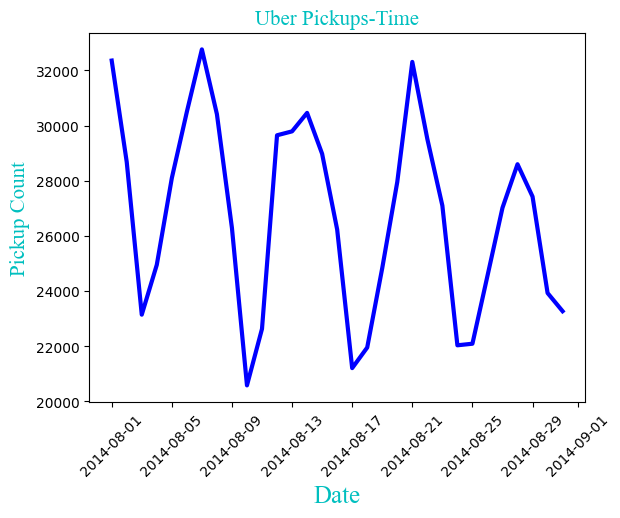

In [26]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups


pickup_count_by_date = df.groupby('Date')['Lat'].count()

#print(pickup_count_by_date)


# Create a line plot to visualize the number of pickups over time

plt.plot(pickup_count_by_date.index, pickup_count_by_date.values,color= 'b' ,linewidth = 3)

plt.xlabel("Date",fontsize = 18,fontname = 'Times New Roman',color = 'c')
plt.ylabel("Pickup Count",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.title("Uber Pickups-Time",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.xticks(rotation=45)
plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

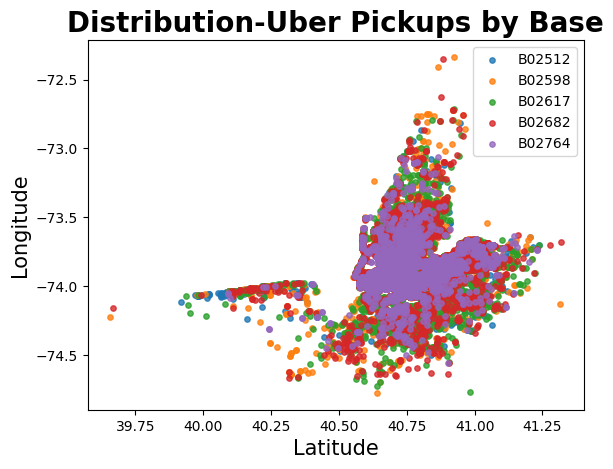

In [27]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
grouped_data = df.groupby('Base')

# Create a scatter plot for each group
for group_name, group_data in grouped_data:
    plt.scatter(group_data['Lat'], group_data['Lon'], label=group_name, s=15, alpha=0.8)

plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.title('Distribution-Uber Pickups by Base', fontsize=20, fontweight='bold')
plt.legend()

plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

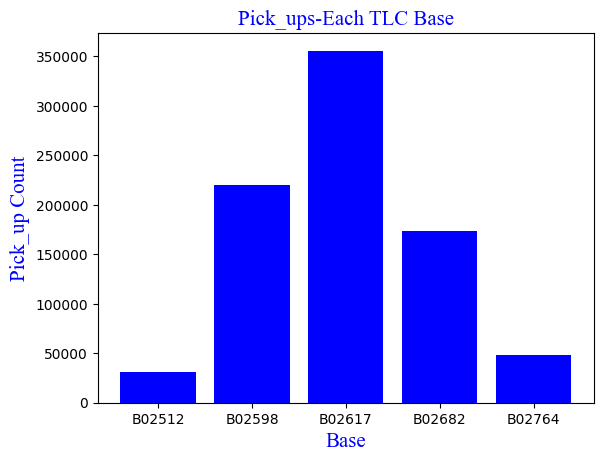

In [28]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_count_base = df.groupby('Base')['Lat'].count()
#print(pickup_count_base)
plt.bar(pickup_count_base.index,pickup_count_base.values, color = 'b')
plt.xlabel('Base',fontname = 'times new roman',fontsize = 15,c = 'b')
plt.ylabel('Pick_up Count',fontname = 'times new roman',fontsize = 15,c = 'b')
plt.title('Pick_ups-Each TLC Base',fontname = 'times new roman',fontsize = 15,c = 'b')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

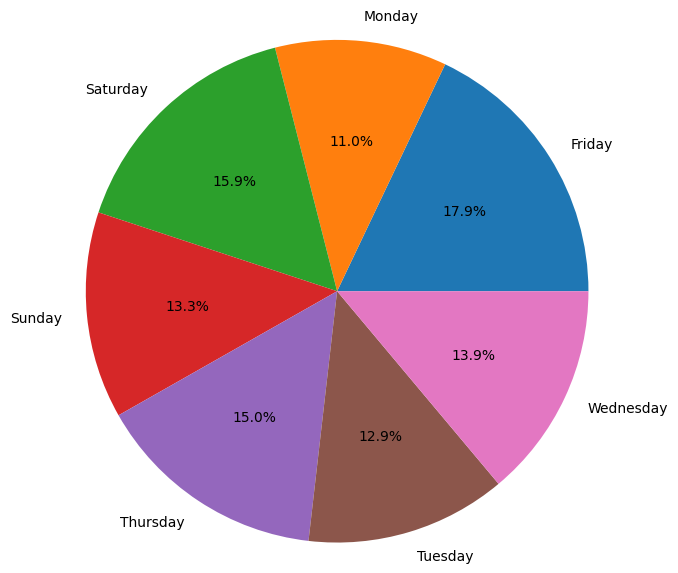

In [29]:
# Find the busiest time of day (hour) for Uber pickups
busiest_hour = pickup_counts1.idxmax()

# Print the busiest hour for Uber pickups
#print("Busiest time of day for Uber pickups:", busiest_hour)
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
#print(df['DayOfWeek'])
pickup_counts = df.groupby('DayOfWeek')['Lat'].count()
labels = pickup_counts.index
counts = pickup_counts.values
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=labels, autopct='%0.1f%%',radius=1.7)
plt.show()